# <center> I. Approche Pattern - Jagger & Lewis</center>

La donnée traitée à travers cette première partie est celle constituée par Quang Vinh NGUYEN à travers la solution MATLAB. Elle correspond à l'approche pattern. Chaque ligne correspon à un ensemble de caractéristiques (Min, Max, Std, Mean) calculés sur les signaux enregistrés par le collier. Le signal en tant que telle sera traité dans une seconde partie. Cette analyse est réalisée dans le but de comprendre au mieux la donnée utilisée dans cette première approche et de proposer une nouvelle approche Machine Learning.

L'approche Machine Learning peut s'avérer très éfficace et moins chronophage si les variables calculées sont pertinentes. De plus avec cette première approche nous avons un bon compromis entre "interprétabilité" et "performance". Afin d'avoir une meilleur compréhension de la donnée l'ensemble des variables ont été renommés.

La première approche Machine Learning proposée par Jagger & Lewis utilise les modèles SVM (Support Vector Machine) et KNN (K-nearest neighbors). L'approche proposée a pour but de réduire la variance (Meilleure généralisation du modèle) et de réduire le biais (Améliorer la performance du modèle) du modèle.

Dans le cas ou cette approche s'avère concluante il sera nécessaire de reprendre la partie preprocessing de MATLAB et de le réécrire en Python afin d'harmoniser le process. Dans le cas contraire nous passerons à l'approche Deep Learning LSTM - CNN. 

# <center> Rappel sur les Features </center>

Information fournit par Quang Vinh NGUYEN, Code MATLAB
-------------

%% Features extraction
 The features are extracted according to a pattern. A pattern corresponds to 3 local minima, i.e. when the 3th hits is reached, the featuers are calculated into the points of this so-called pattern. 
The features are : 

    Mean of ax, ay, az, norm(a), gx, gy, gz, norm(g), norm(m) 
    Max of ax, ay, az, norm(a), gx, gy, gz, norm(g), norm(m)
    Min of ax, ay, az, norm(a), gx, gy, gz, norm(g), norm(m)
    Standart deviation of ax, ay, az, norm(a), gx, gy, gz, norm(g), norm(m)
    Max of the fast fourier transform of ax, ay, az
    Number of points in a pattern 
    Entropy of the norm of a



Voir aussi les codes Matlab pour le plus détail
-------------
   
% Accelerometer acquisition
ax      = data_imu(:,2);
ay      = data_imu(:,3);
az      = data_imu(:,4);
acc_raw = sqrt(ax.^2 + ay.^2 + az.^2);

% Gyroscope acquisition
gx      = data_imu(:,5);
gy      = data_imu(:,6);
gz      = data_imu(:,7);
gyro    = sqrt(gx.^2 + gy.^2 + gz.^2);

% Magnetometer acquisition
 mx      = data_imu(:,8);
 my      = data_imu(:,9);
 mz      = data_imu(:,10);
%  mag     = data_imu(:,8);
 mag    =  sqrt(mx.^2 + my.^2 + mz.^2);

% Filtering data
fc      = 5;
order   = 4;
ax      = butlowfilt(ax,Fs,fc,order);
ay      = butlowfilt(ay,Fs,fc,order);
az      = butlowfilt(az,Fs,fc,order);
gx      = butlowfilt(gx,Fs,fc,order);
gy      = butlowfilt(gy,Fs,fc,order);
gz      = butlowfilt(gz,Fs,fc,order);
acc     = butlowfilt(acc_raw,Fs,fc,order);
gyro    = butlowfilt(gyro,Fs,fc,order);
mag     = butlowfilt(mag,Fs,fc,order);

% Find local minima
[xmax,imax,xmin,imin]   = extrema(acc);
imin                    = sort(imin);
if imin(end) == length(acc)
    min_local = [1;imin];
else
    min_local = [1;imin;length(acc)];
end


%% FEATURES EXTRACTION

k   = 1;
N   = 512;

for i = 4 : 3 : length(min_local) 
    
    % Pattern    
    ind_pattern     = min_local(i-3) : min_local(i)-1;
    size_pattern    = length(ind_pattern);
    
    % Features
    tab             = [acc(ind_pattern)'; ax(ind_pattern)'; ay(ind_pattern)'; az(ind_pattern)'; gyro(ind_pattern)'; gx(ind_pattern)'; gy(ind_pattern)'; gz(ind_pattern)'; mag(ind_pattern)'];
    mean_tab        = mean(tab, 2);
    max_tab         = max(tab, [], 2);
    min_tab         = min(tab, [], 2);
    std_tab         = std(tab, 0, 2);

    sensor_index    = 1;
      
    features(1,k)   = mean_tab(sensor_index);
    features(2,k)   = max_tab(sensor_index);
    features(3,k)   = min_tab(sensor_index);
    features(4,k)   = std_tab(sensor_index);
    
    sensor_index    = sensor_index + 1;

    features(5,k)   = mean_tab(sensor_index);
    features(6,k)   = max_tab(sensor_index);
    features(7,k)   = min_tab(sensor_index);
    features(8,k)   = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;

    features(9,k)   = mean_tab(sensor_index);
    features(10,k)  = max_tab(sensor_index);
    features(11,k)  = min_tab(sensor_index);
    features(12,k)  = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;
    
    features(13,k)  = mean_tab(sensor_index);
    features(14,k)  = max_tab(sensor_index);
    features(15,k)  = min_tab(sensor_index);
    features(16,k)  = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;
      
    features(17,k)  = mean_tab(sensor_index);
    features(18,k)  = max_tab(sensor_index);
    features(19,k)  = min_tab(sensor_index);
    features(20,k)  = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;

    features(21,k)  = mean_tab(sensor_index);
    features(22,k)  = max_tab(sensor_index);
    features(23,k)  = min_tab(sensor_index);
    features(24,k)  = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;

    features(25,k)  = mean_tab(sensor_index);
    features(26,k)  = max_tab(sensor_index);
    features(27,k)  = min_tab(sensor_index);
    features(28,k)  = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;

    features(29,k)  = mean_tab(sensor_index);
    features(30,k)  = max_tab(sensor_index);
    features(31,k)  = min_tab(sensor_index);
    features(32,k)  = std_tab(sensor_index);

    sensor_index    = sensor_index + 1;

    features(33,k)  = mean_tab(sensor_index);   
    features(34,k)  = max_tab(sensor_index);
    features(35,k)  = min_tab(sensor_index);
    features(36,k)  = std_tab(sensor_index);

    features(37,k)  = max(fftshift(abs(fft(ax(ind_pattern),2*N))));
    features(38,k)  = max(fftshift(abs(fft(ay(ind_pattern),2*N))));
    features(39,k)  = max(fftshift(abs(fft(az(ind_pattern),2*N))));

    features(40,k)  = size_pattern;
    features(41,k)  = wentropy(acc(ind_pattern),'shannon');

    k = k +1;
    
end

features = features';

Nom des features calculés:

- features(1,k)   = acc_mean
- features(2,k)   = acc_max
- features(3,k)   = acc_min
- features(4,k)   = acc_std
- features(5,k)   = ax_mean
- features(6,k)   = ax_max
- features(7,k)   = ax_min
- features(8,k)   = ax_std
- features(9,k)   = ay_mean
- features(10,k)  = ay_max
- features(11,k)  = ay_min
- features(12,k)  = ay_std
- features(13,k)  = az_mean
- features(14,k)  = az_max
- features(15,k)  = az_min
- features(16,k)  = az_std
- features(17,k)  = gyro_mean
- features(18,k)  = gyro_max
- features(19,k)  = gyro_min
- features(20,k)  = gyro_std
- features(21,k)  = gx_mean
- features(22,k)  = gx_max
- features(23,k)  = gx_min
- features(24,k)  = gx_std
- features(25,k)  = gy_mean
- features(26,k)  = gy_max
- features(27,k)  = gy_min
- features(28,k)  = gy_std
- features(29,k)  = gz_mean
- features(30,k)  = gz_max
- features(31,k)  = gz_min
- features(32,k)  = gz_std
- features(33,k)  = mag_mean 
- features(34,k)  = mag_max
- features(35,k)  = mag_min
- features(36,k)  = mag_std
- features(37,k)  = max_fftshift_ax
- features(38,k)  = max_fftshift_ay
- features(39,k)  = max_fftshift_az
- features(40,k)  = size_pattern
- features(41,k)  = wentropy

Questions: Pourquoi les features mag_x, mag_y, mag_z ne sont pas dans la liste des features? De même pour max_fftshift_gx, max_fftshift_gy, max_fftshift_gz, , max_fftshift_mx, max_fftshift_my, max_fftshift_mz?

Il serait intéressant de les ajouter afin d'étudier l'impact sur le modèle de Machine Learning.

# <center> Importation & Preprocessing </center>

Les fichiers récupérés sont découpés par taille de chien. XS / S / M / L / XL.

- db1 = XS
- db2 = S
- db3 = M
- db4 = L
- db5 = XL

In [20]:
# Basics
import numpy as np 
import pandas as pd
import warnings
import scipy as sc
import pandas_profiling

# Serialization
from sklearn.externals import joblib 

# Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Dimensional reduction
from sklearn.manifold import TSNE

# Preprocessing & sampling
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Machine Learning
import lightgbm as lgb
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

# SRT
import srt

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
list_name = ['acc_mean','acc_max','acc_min','acc_std','ax_mean','ax_max','ax_min','ax_std','ay_mean','ay_max','ay_min','ay_std','az_mean','az_max','az_min','az_std','gyro_mean','gyro_max','gyro_min','gyro_std','gx_mean','gx_max','gx_min','gx_std','gy_mean','gy_max','gy_min','gy_std','gz_mean','gz_max','gz_min','gz_std','mag_mean','mag_max','mag_min','mag_std','max_fftshift_ax','max_fftshift_ay','max_fftshift_az','size_pattern','wentropy']

data_XS = pd.read_csv ("db1.txt", delimiter="\t", header = -1).transpose()
data_XS['Type'] = 1

data_S  = pd.read_csv ("db2.txt", delimiter="\t", header = -1).transpose()
data_S['Type']  = 2

data_M  = pd.read_csv ("db3.txt", delimiter="\t", header = -1).transpose()
data_M['Type']  = 3

data_L  = pd.read_csv ("db4.txt", delimiter="\t", header = -1).transpose()
data_L['Type']  = 4

data_XL = pd.read_csv ("db5.txt", delimiter="\t", header = -1).transpose()
data_XL['Type'] = 5

data = pd.concat([data_XS, data_S, data_M, data_L, data_XL], ignore_index=True)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
joblib.dump(min_max_scaler, 'min_max_scaler.pkl') 
df_normalized = pd.DataFrame(np_scaled)

id_XS = pd.read_csv ('id_db1.txt', delimiter="\t", header = -1).transpose()
id_S  = pd.read_csv ('id_db2.txt', delimiter="\t", header = -1).transpose()
id_M  = pd.read_csv ('id_db3.txt', delimiter="\t", header = -1).transpose()
id_L  = pd.read_csv ('id_db4.txt', delimiter="\t", header = -1).transpose()
id_XL = pd.read_csv ('id_db5.txt', delimiter="\t", header = -1).transpose()

id_data = pd.concat([id_XS, id_S, id_M, id_L, id_XL], ignore_index=True)
id_data.columns = ['Target']
data_valid = df_normalized.join(id_data)

In [22]:
np.unique(id_data)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 24, 25])

In [23]:
data.head()

0            1            2           3            4  \
0  4514.899951  6070.202770  3352.277869  832.357428 -2035.252009   
1  4217.132777  4397.692466  4076.576411   78.587494 -2112.054287   
2  4219.028335  4257.445317  4193.604571   18.149528 -2169.020364   
3  4202.660890  4276.103074  4131.054135   34.960463 -2093.735847   
4  4233.383206  4318.451637  4151.333637   38.384748 -1689.306367   

             5            6           7            8           9  ...   \
0 -1411.524043 -2656.756750  428.197088 -1603.432840 -827.610400  ...    
1 -2056.300227 -2184.504691   44.187821   234.240845  349.241311  ...    
2 -2128.800221 -2212.459295   26.388038   226.736326  267.761245  ...    
3 -1850.150963 -2169.471099   88.536333   165.856557  245.965023  ...    
4 -1633.282241 -1828.912063   67.427346   246.596403  326.759416  ...    

            32           33           34         35            36  \
0   728.112610   748.095344   715.343589  10.921904  48846.048219   
1  1191.301911  1212.876402  1174.561444   8.903052  69697.791459   
2  1186.112320  1194.518124  1180.860687   3.603627  69408.651663   
3  1183.743347  1198.388265  1177.264971   4.528039  87936.905573   
4  1207.834247  1228.332241  1189.887923  10.174593  65882.948303   

             37             38    39            40  Type  
0  38482.388162   80095.537700  24.0 -8.550445e+09     1  
1   7729.947880  120071.874387  33.0 -9.801144e+09     1  
2   7255.562421  115534.945009  32.0 -9.509621e+09     1  
3   6965.975402  152763.771936  42.0 -1.237968e+10     1  
4   9617.259720  151010.786164  39.0 -1.167446e+10     1  

[5 rows x 42 columns]

In [24]:
data_valid.columns = list_name + ['Type','Target']
pandas_profiling.ProfileReport(data_valid)

# <center>  Data visualisation </center> 

Répartition des observations par type de chien
-------

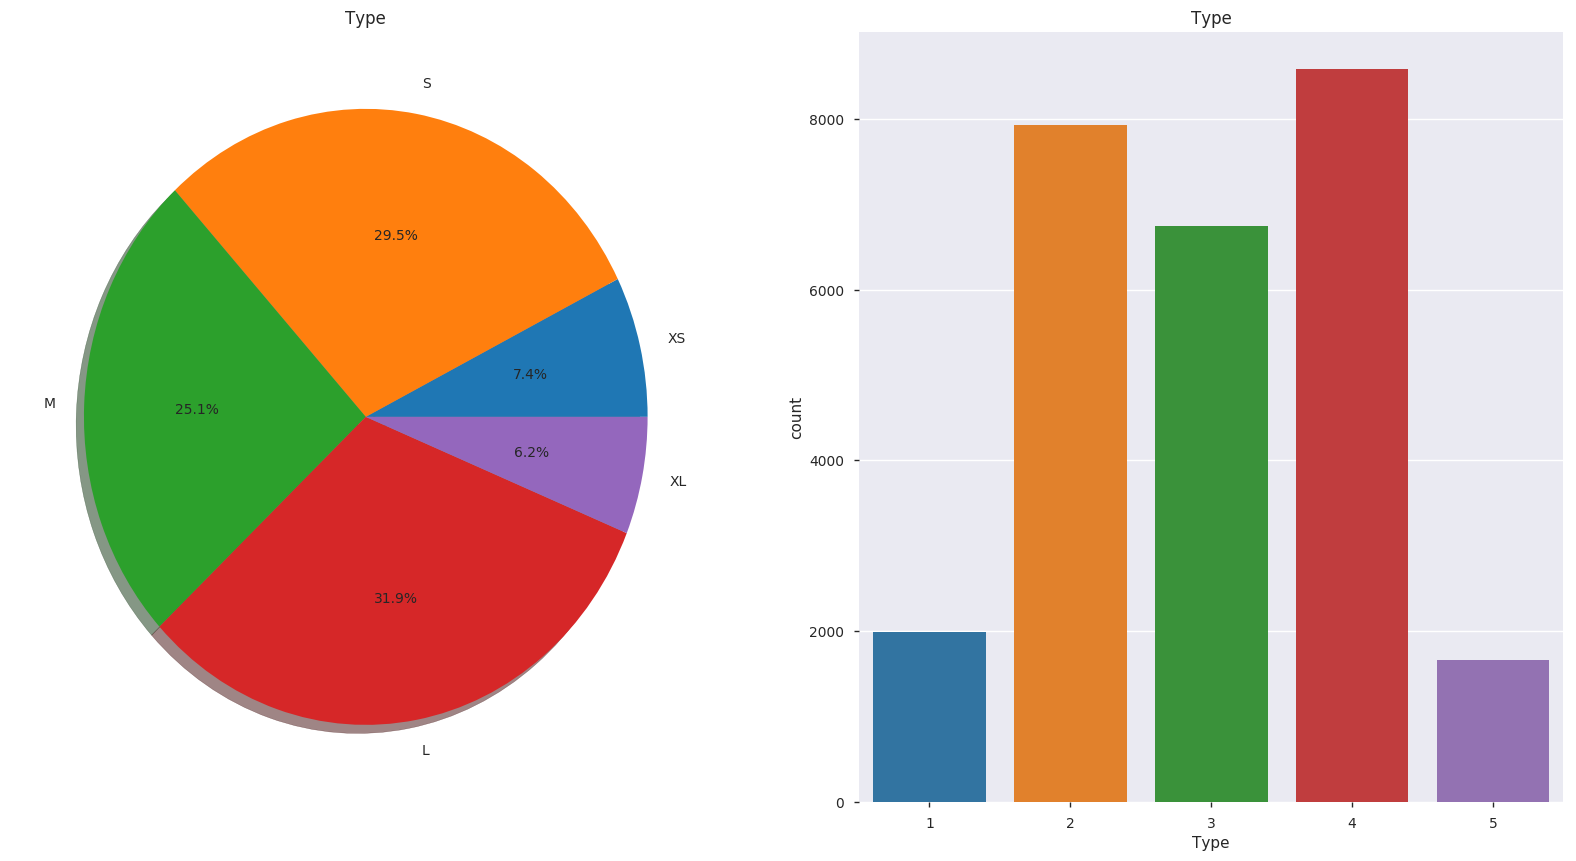

In [25]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot('Type',data = data,ax = ax[1])
data['Type'].value_counts(sort = False).plot.pie(ax = ax[0], autopct='%1.1f%%', shadow = True, labels = ['XS', 'S', 'M', 'L', 'XL'])
ax[0].set_title('Type')
ax[0].set_ylabel('')
ax[1].set_title('Type')
plt.show()

Les tailles chiens les plus représentées dans notre échantillon correspondent à au taille S, M L. Les tailles "extrèmes" XS & XL sont sous représentés avec réspectivement  8.3% et 7.9%.

Les trois autres tailles de chiens sont bien représentés avec pour la taille S: 27.5% M:24.1% et L:32.1%.

Légende: 
- Type 1 = XS
- Type 2 = S
- Type 3 = M
- Type 4 = L
- Type 5 = XL

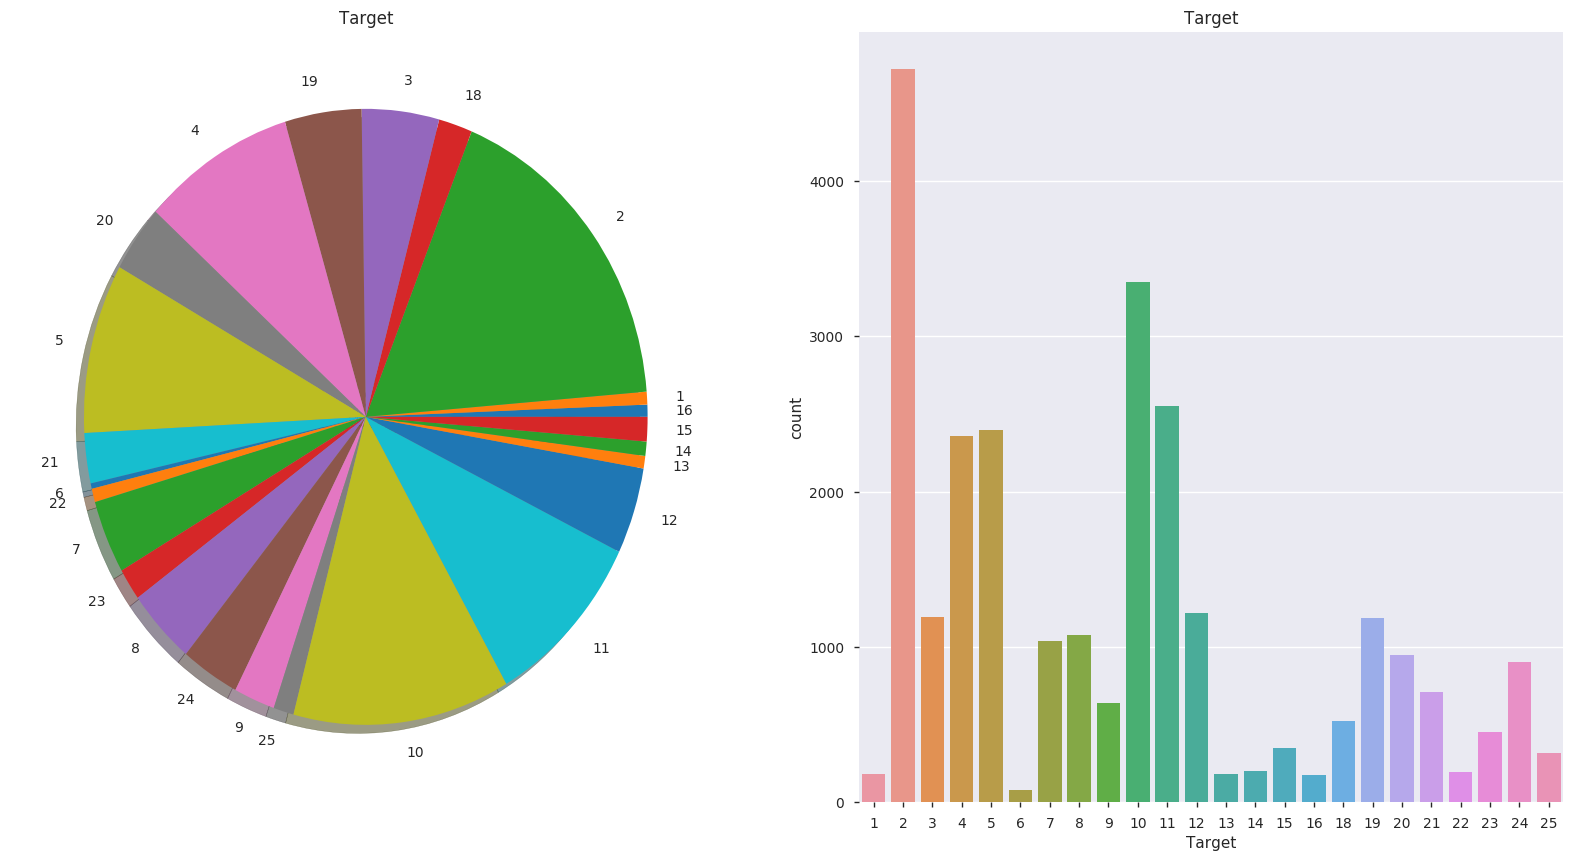

In [26]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot('Target',data = data_valid, ax = ax[1])
data_valid['Target'].value_counts(sort = False).plot.pie(ax = ax[0],shadow = True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
ax[1].set_title('Target')
plt.show()

La variable à prédire est celle du comportement du chien. Variable catégorielle à 25 catégories. En étudiant la répartition de cette variable on remarque que notre échantillon est très déséquilibré. On peut emettre l'hypothèse qu'il sera plus difficile de prédire certaines catégories au vu de leur fréquence.

Les comportements les moins représentés sont: 1, 13, 22, 14, 16, 25 et 15.
les comportements les plus représentés sont: 2, 10, 11, 4, 5, 19 et 3.

A voir si l'ensemble des catégories peuvent être classés selon un critère d'importance.

Légende:
- SeSecouer: 1   
- Manger: 2
- Boire: 3
- DeboutIm: 4
- AssisIm: 5
- CoucheIm: 6
- Couchedors: 6
- HaleterDeb: 7
- HaleterAss: 8
- HaleterCou: 9
- Marcher: 10
- Trotter: 11
- Courir: 12
- Monter: 13
- Descendre: 14
- TournerG: 15
- TournerD: 15
- Aboyer: 16
- Bailler: 17 *** Pas dans le fichier
- SeGratter: 18
- ReniflerMarchant: 19
- Renifler: 20
- MangerDebout: 21
- SeMordiller: 22
- SeLecher: 23
- SeLecher_bas: 24
- Bipede1: 25
- Bipede2: 25 

Correlation Linaire - Heatmap
------

La heatmap permet de mettre en exergue certaines corrélations entre les variables. Dans notre cas nous pouvons voir qu'une partie des variables concernant le gyro sont fortement corrélés entre elles.

Il est intéressant de remarquer aussi que l'ensemble des variables liées aux magnétomètre posssèdent peu de corrélations avec le reste des variables.

Peu de corrélation linéaire entre notre variable cible et nos variables prédictives. Ce qui est normal dans notre cas étant donnée que notre variable à prédire est catégorielle.

Ces éléments sont à garder en tête pour la mise en place et l'optimisation du modèle de Machine Learning.

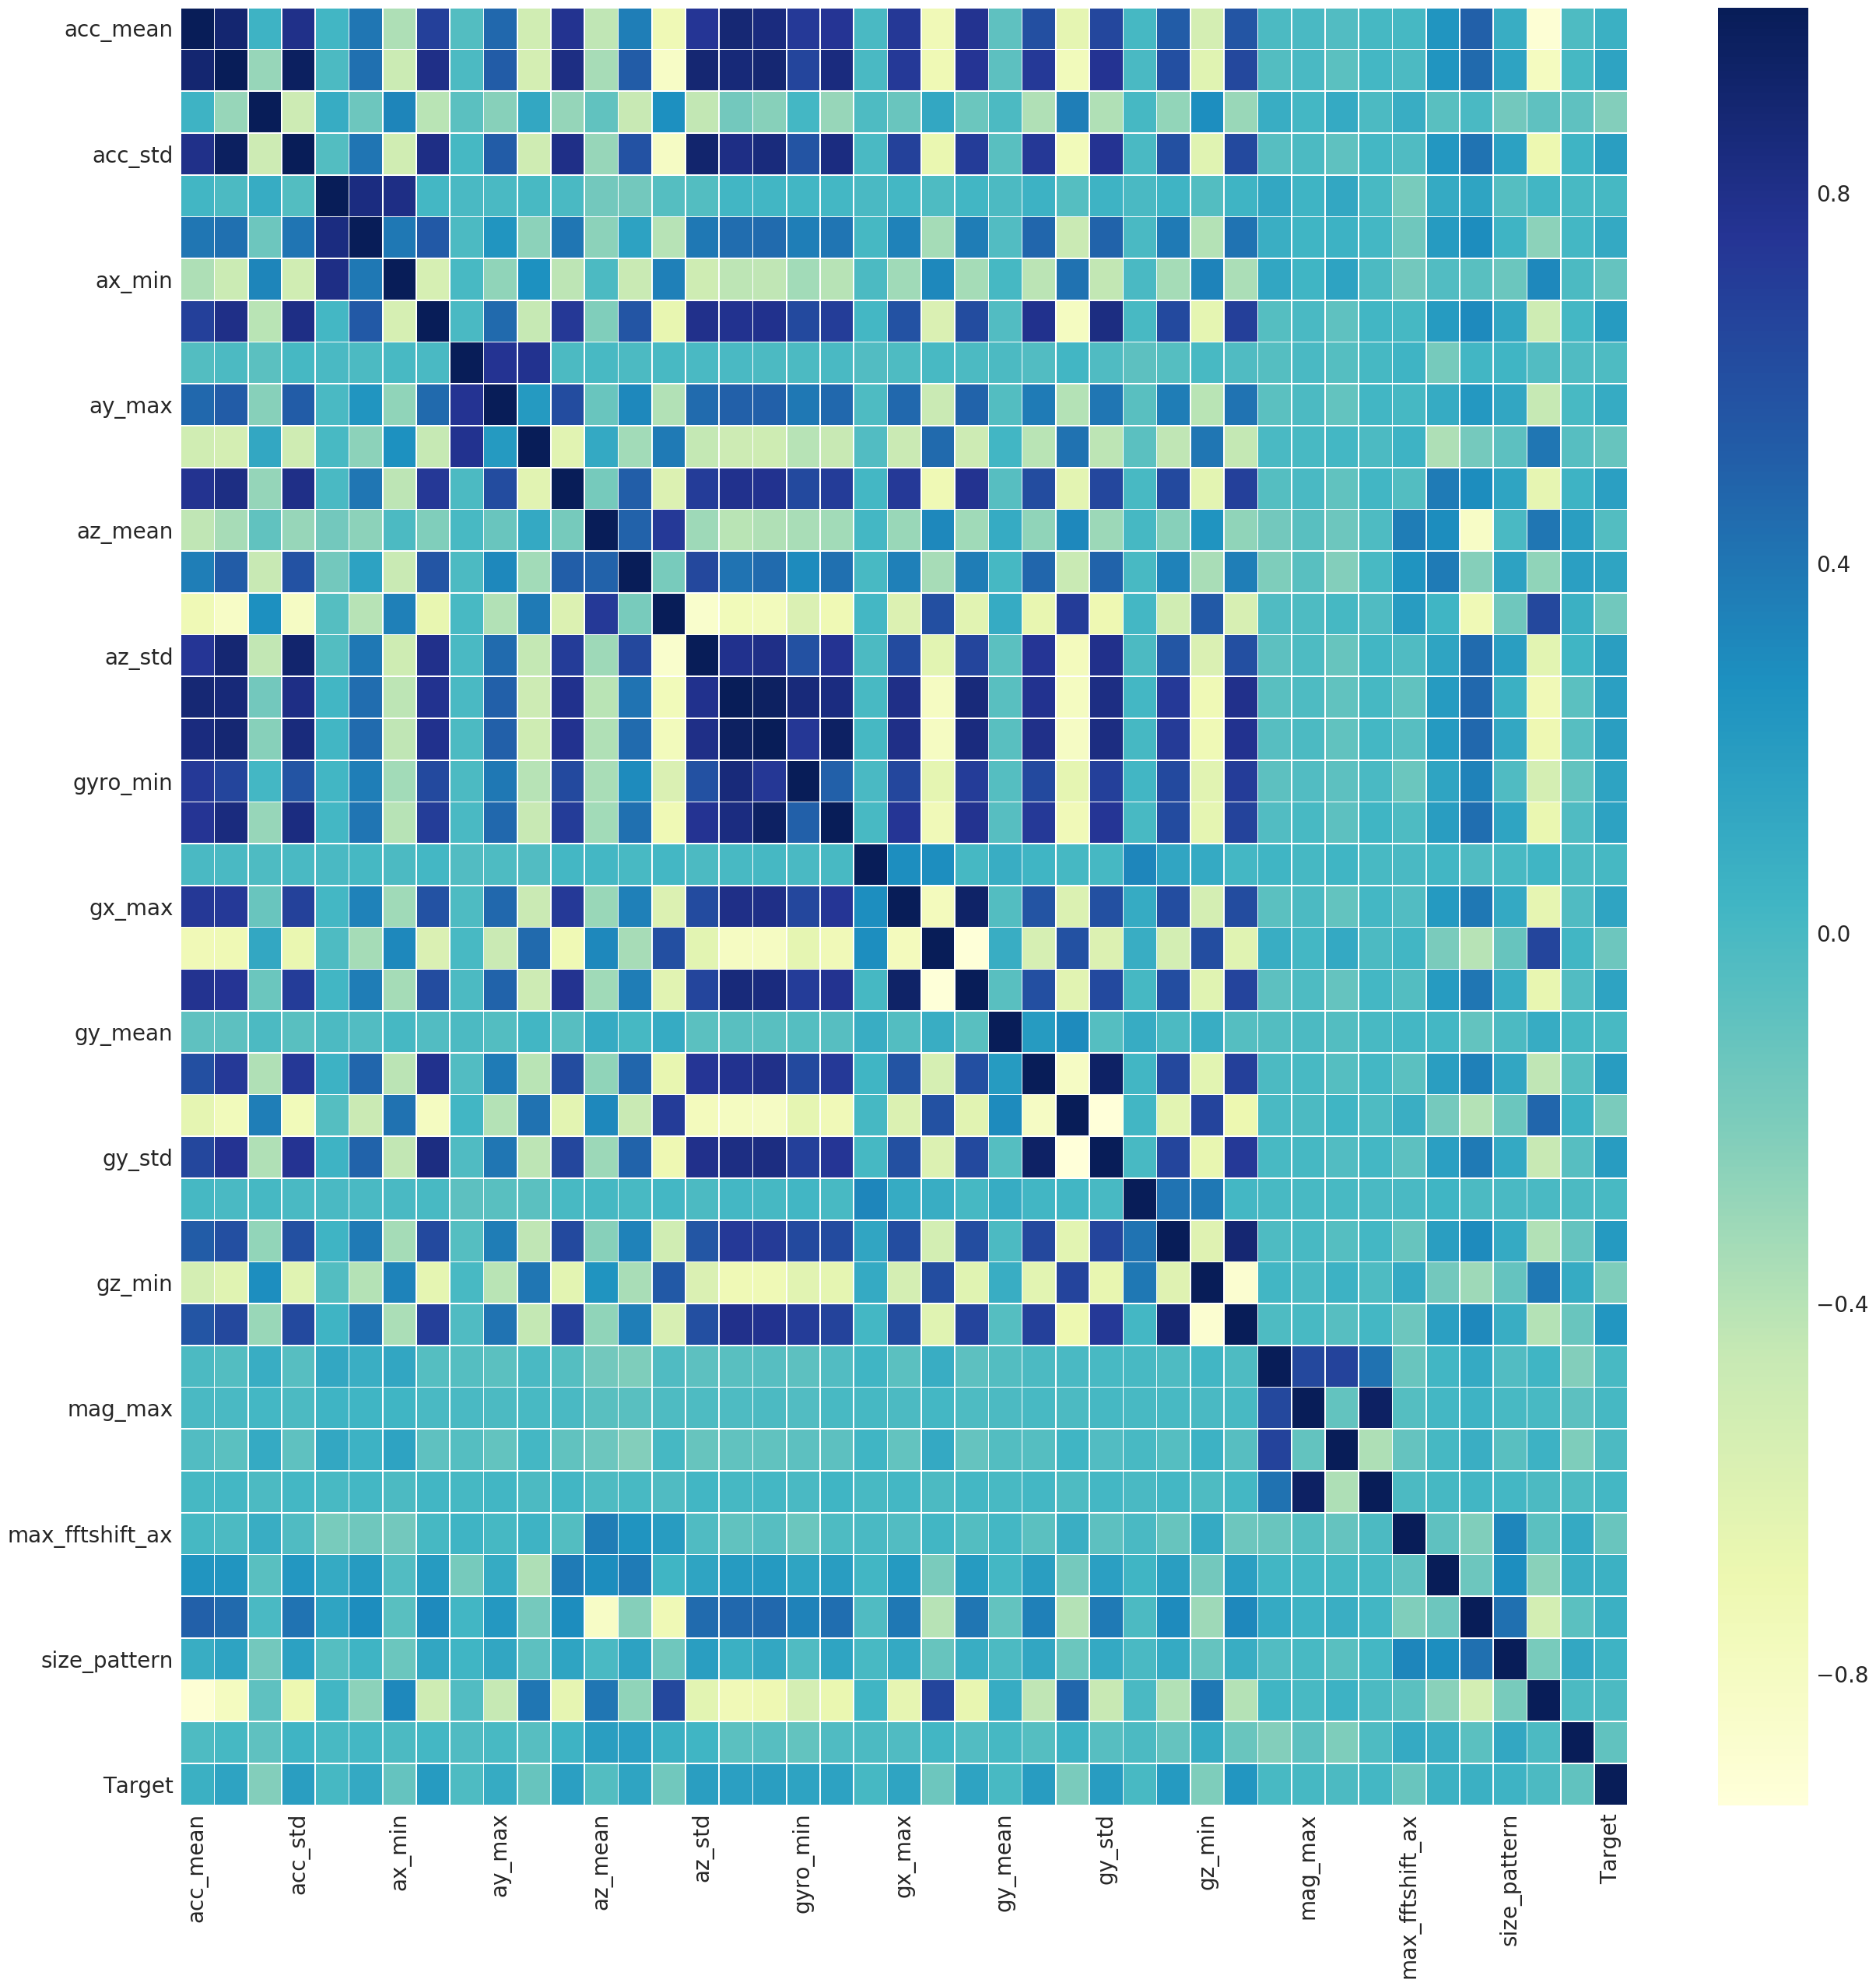

In [27]:
sns.set(font_scale = 2)
sns.heatmap(data_valid.corr(), cmap = 'YlGnBu', linewidths = 0.5)
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()

Réduction de dimension
-----

Dans le but de visualiser nos données, nous allons utilisés une méthode de réduction de dimension appelée TSNE (t-distributed stochastic neighbor embedding). Cette méthode nous permettra de visualiser notre données dans un espace de dimension 2 - 3. 

Il est interessant de voir si l'ensemble de comportements à prévoir sont facilement séparable dans un espace de dimension 2 -3.

In [28]:
train_y = data_valid.Target
train_merge = data_valid.drop('Target', axis = 1)

In [29]:
train_y.unique()

array([16,  5, 25,  3, 12,  4, 14,  8,  7,  2, 21, 10, 13, 20, 19, 18, 23,
       24, 22,  1, 15, 11,  6,  9])

In [87]:
target_names = train_merge.Type

tsne = TSNE(n_components = 2, init = 'pca', random_state = 1001, perplexity = 30, method = 'barnes_hut', n_iter = 1000, verbose = 1)
X_tsne = tsne.fit_transform(train_merge.drop('Type', axis = 1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 26913 samples in 0.072s...
[t-SNE] Computed neighbors for 26913 samples in 28.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26913
[t-SNE] Computed conditional probabilities for sample 2000 / 26913
[t-SNE] Computed conditional probabilities for sample 3000 / 26913
[t-SNE] Computed conditional probabilities for sample 4000 / 26913
[t-SNE] Computed conditional probabilities for sample 5000 / 26913
[t-SNE] Computed conditional probabilities for sample 6000 / 26913
[t-SNE] Computed conditional probabilities for sample 7000 / 26913
[t-SNE] Computed conditional probabilities for sample 8000 / 26913
[t-SNE] Computed conditional probabilities for sample 9000 / 26913
[t-SNE] Computed conditional probabilities for sample 10000 / 26913
[t-SNE] Computed conditional probabilities for sample 11000 / 26913
[t-SNE] Computed conditional probabilities for sample 12000 / 26913
[t-SNE] Computed conditional probabilities for sa

In [88]:
colors = ['blue', 'red','green','yellow','brown','pink','black','purple','orange',
         'darkorange','cornsilk','orangered','springgreen','yellowgreen','violet','tomato','olive','aqua','deepskyblue',
         'maroon','indigo','darkmagenta','turquoise','midnightblue']

target_names = np.unique(train_y)
list_label = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25]

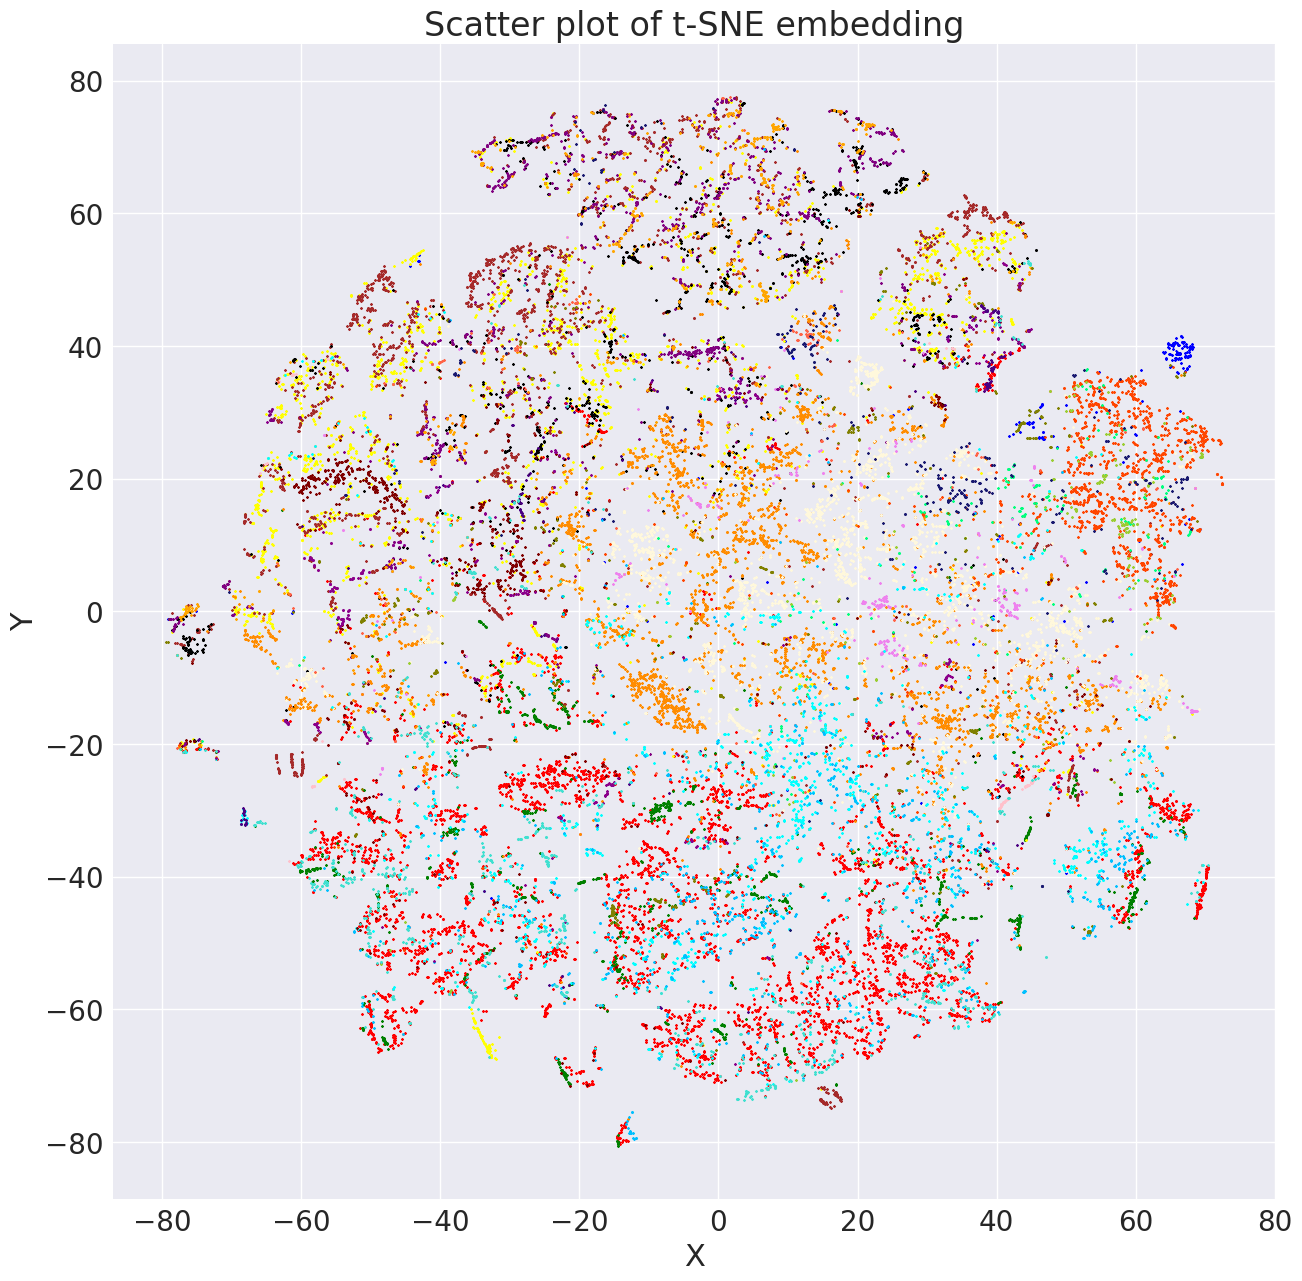

In [89]:
plt.figure(2, figsize = (15, 15))

for color, i, target_name in zip(colors, list_label, list_label):
    plt.scatter(X_tsne[train_y == i, 0], X_tsne[train_y == i, 1], color = color, s = 1,
                alpha = 1, label = target_name, marker='x')

plt.title('Scatter plot of t-SNE embedding')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('t-SNE-01.png', dpi=150)
plt.show()

A première vue on remarque que certains comportements seront plus facilement identifiable. Par exemple, nous pouvons voir que le comportement liés à la couleur rouge foncés et rouge clair sont très éloignés l'un de l'autre et l'ensemble des points associés proches les uns des autres.

In [90]:
to_cluster = pd.DataFrame(X_tsne)
estimator = KMeans(n_clusters = 10, random_state = 1987)
estimator.fit(to_cluster)
labels = estimator.labels_

label_behave = pd.DataFrame(train_y, columns = ['Target'])
to_visu = label_behave.join(pd.DataFrame(labels, columns = ['Cluster']))

for i in range(10):
    print(to_visu.groupby(['Cluster','Target']).size()[i].sort_values(ascending = False)[:2])

Target
10    647
2     612
dtype: int64
Target
10    1133
11    1048
dtype: int64
Target
2    1311
3     354
dtype: int64
Target
4    842
5    716
dtype: int64
Target
4    419
5    321
dtype: int64
Target
12    1117
11     502
dtype: int64
Target
2     1689
20     338
dtype: int64
Target
5    781
8    535
dtype: int64
Target
10    384
5     333
dtype: int64
Target
2     704
10    669
dtype: int64


A l'aide du méthode non supvervisé nous avons essayé de regrouper les comportements ensemble dans 10 "paquets" différents afin de voir lesquels se ressemblent le plus. Les données utilisés pour cela sont les informations récupérés après la réduction de dimension (pour une meilleure performance).

Nous en déduisons que les comportements suivant sont "assez proches":
- Manger / Boire
- Debout / Assis
- Courir / Trotter
- Manger / Renifler
- Assis / Haleter assis

Au vue du nombre de comportements différents et de cluster il est difficile de visualiser l'information proprement.


# <center> Modèle de Machine Learning </center>

L'optique de cette partie est de tester d'autres modèles de Machine Learning. Les modèles qui ont utilisés pour l'approche pattern sont: KNN & SVM.

Dans un premier nous allons mettre en place un premier modèle simple afin de voir si il y a ou non des variables discriminantes dans notre données afin de séparer au mieux la variable catégorielle à prédire.

Puis nous mettrons en place un modèle de Machine Learning orienté autour des concepts d'arbres de décision (+ bagging + pénalisation) permettant de capter au mieux l'information "non linéaire" de notre échantillon. De plus nous mettrons en place une méthode permettant de maitriser au mieux le Biais et la Variance de notre modèle.

Pour rappel le modèle de Deep Learning utilisé n'est clairement pas robuste et réalise un sur apprentissage ! (98% Train - 70% Test - 70% Validation).

Ainsi notre baseline se situe autour des 70% de précisions !

In [30]:
train_y = train_y.apply(lambda x: str(x))
train_y.unique()

array(['16', '5', '25', '3', '12', '4', '14', '8', '7', '2', '21', '10',
       '13', '20', '19', '18', '23', '24', '22', '1', '15', '11', '6',
       '9'], dtype=object)

In [31]:
#train_merge.drop('Type', axis = 1, inplace = True)

In [32]:
feat_names = train_merge.columns.values

neigh = KNeighborsClassifier(n_neighbors = 3)
model = ExtraTreesClassifier(n_estimators = 100, max_depth = 30, max_features = 0.3, n_jobs = -1, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(train_merge, train_y, test_size=0.33, random_state=42)

model.fit(X_train, y_train)
neigh.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_n = neigh.predict(X_test)

print(accuracy_score(y_pred, y_test), accuracy_score(y_pred_n, y_test))

(0.7750506642648052, 0.7221346543571268)


In [33]:
pd.Series(y_pred).unique()

array(['12', '2', '7', '19', '10', '21', '9', '3', '11', '5', '4', '18',
       '8', '14', '15', '23', '20', '24', '22', '16', '25', '13', '1',
       '6'], dtype=object)

In [34]:
pd.Series(y_pred_n).unique()

array(['12', '2', '7', '10', '21', '9', '3', '11', '19', '5', '4', '18',
       '8', '16', '13', '23', '25', '15', '20', '24', '22', '14', '1',
       '6'], dtype=object)

Le premier modèle "Quick & Dirty" nous amène à un taux de précision de 77% sans hyperparamétrage et avec un échantillonage relativement basique.

Il est toujours interessant d'étudier l'importance des variables du modèle afin d'essayer de comprendre les éléments discriminant de notre jeux de données. 

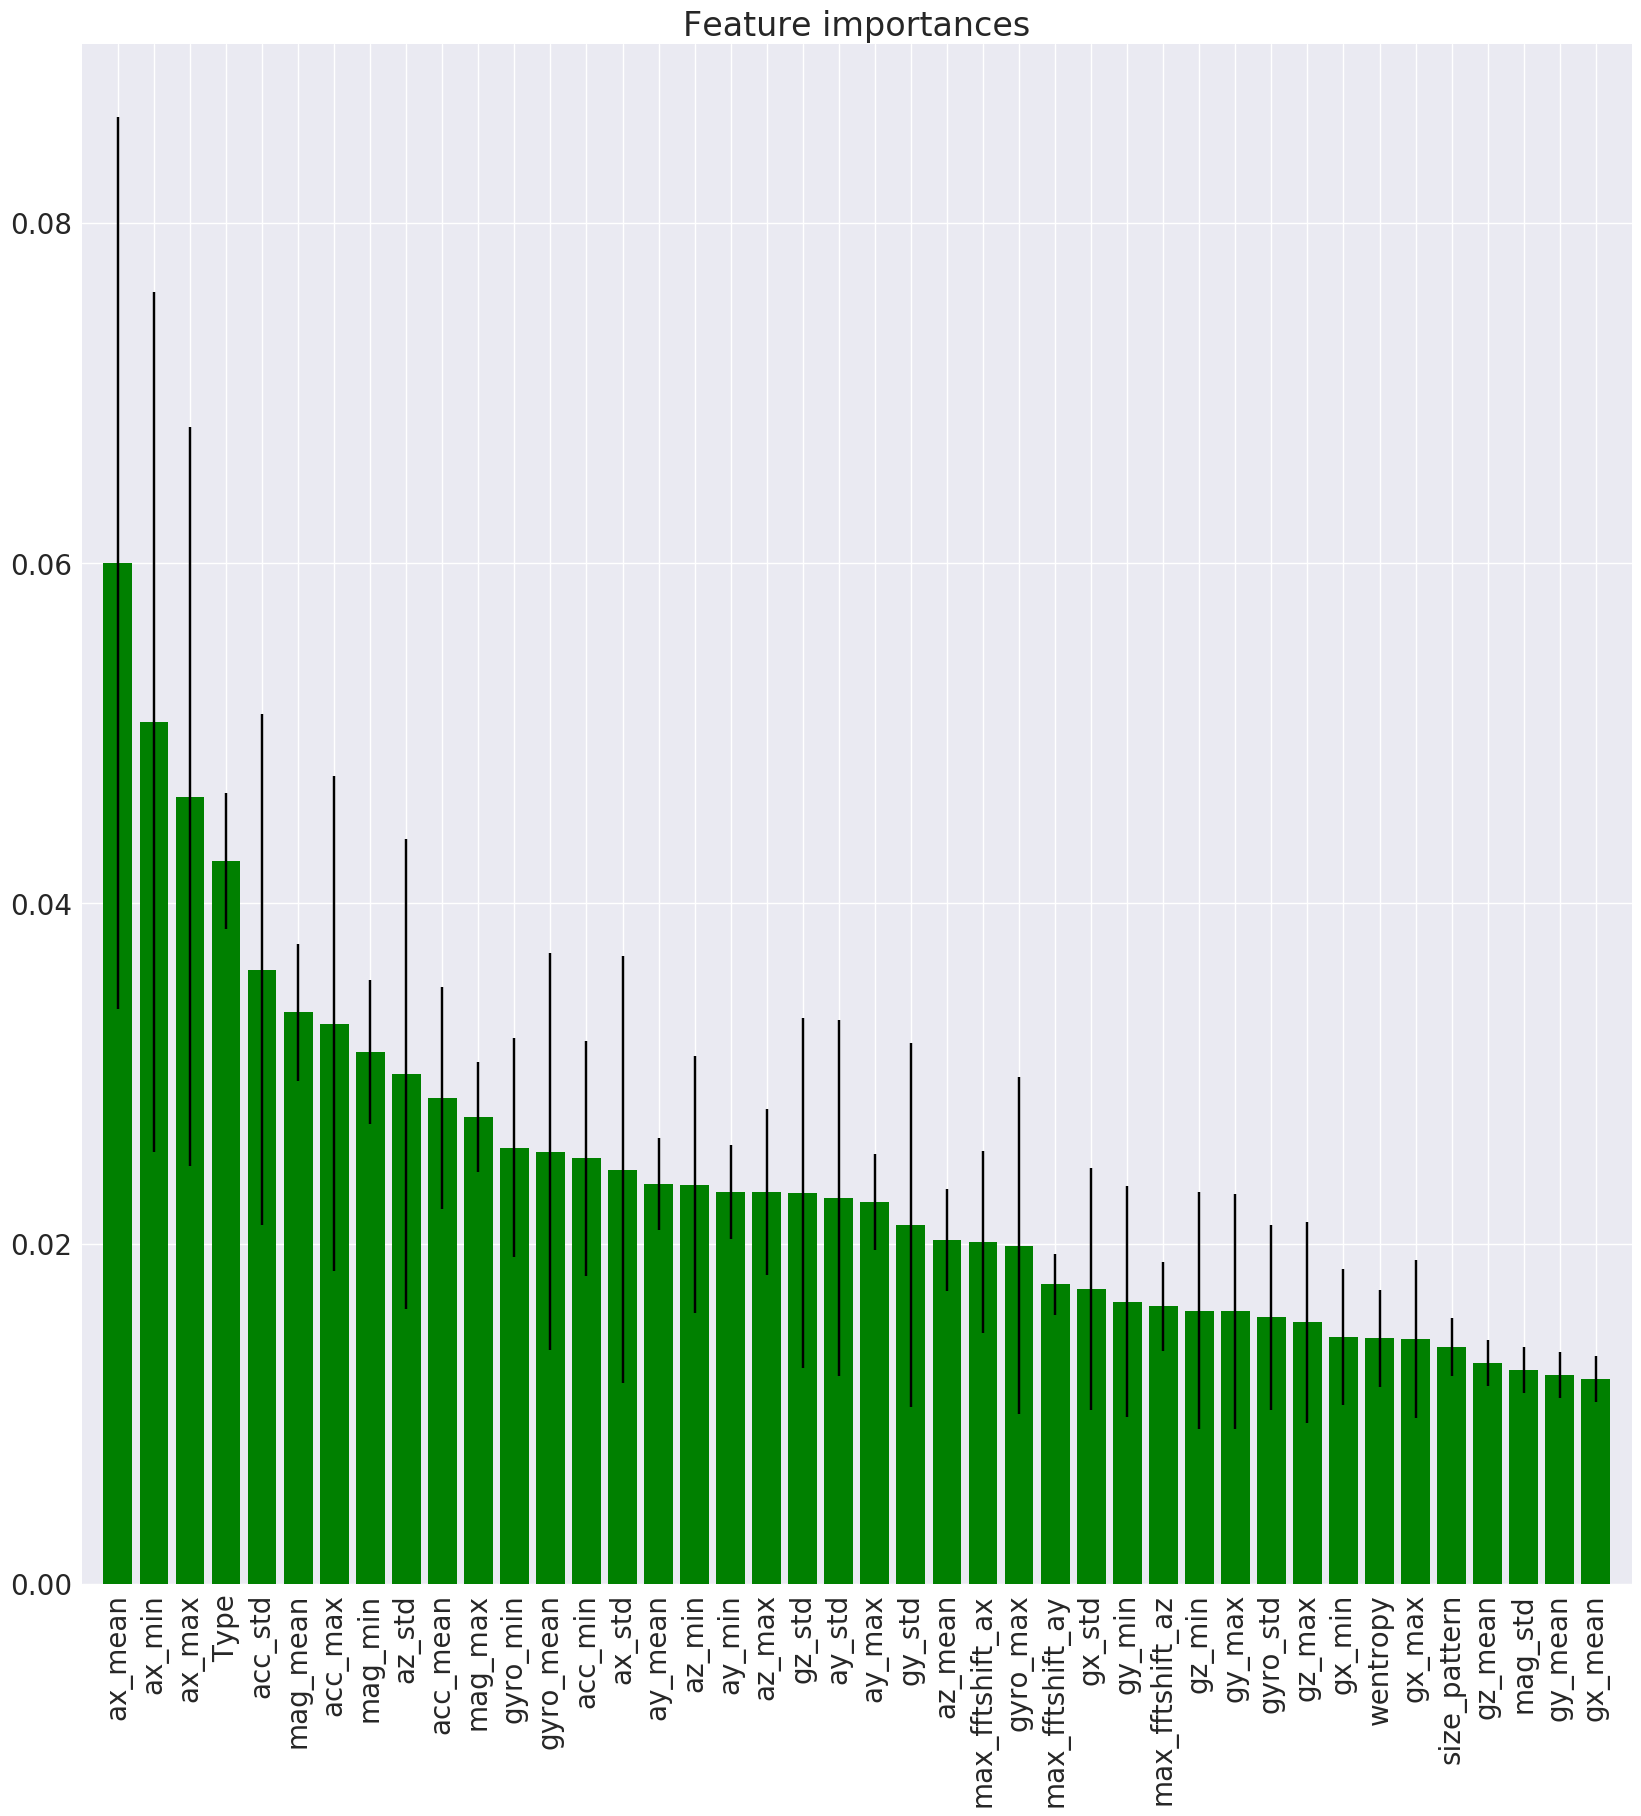

In [35]:
## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:43]

plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color = "green", yerr = std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [36]:
def cross_validate(model, dataframe, y, folds = 5, repeats = 5):
    '''
    Function to do the cross validation - using stacked Out of Bag method instead of averaging across folds.
    model = algorithm to validate. Must be scikit learn or scikit-learn like API 
    x = training data, numpy array
    y = training labels, numpy array
    folds = K, the number of folds to divide the data into
    repeats = Number of times to repeat validation process for more confidence
    '''
    ypred = np.zeros((len(y),repeats))
    score = np.zeros(repeats)
    index = np.array(dataframe.index)
    index_out = np.zeros((len(y),repeats))
    x = np.array(dataframe)
    
    for r in range(repeats):
        i = 0
        j = r
        x,y = shuffle(x, y, random_state = r) 
        index = shuffle(index, random_state = r)
        index_out[:,r] = index
        kf = StratifiedKFold(n_splits = folds, shuffle = False,  random_state = i + 1000)
        for train_ind, test_ind in kf.split(x, y):
            xtrain, ytrain = x[train_ind,:], y[train_ind]
            xtest, ytest = x[test_ind,:], y[test_ind]
            model.fit(xtrain, ytrain)
            joblib.dump(model, 'model_test' + str(i) + '_' + str(j) +'_.pkl') 
            ypred[test_ind,r] = model.predict(xtest)
            i+= 1
            j+=0
        score[r] = accuracy_score(y,ypred[:,r])
        print(accuracy_score(y,ypred[:,r]))
    print('Mean:',str(np.mean(score)))
    print('Deviation:',str(np.std(score)))
    return ypred, index_out.astype(int), np.mean(score)

def main_l1(train_input = train_merge, rep = 5, regressor = lgb.LGBMClassifier()):
    train = train_input.copy()
    y = np.array(train_y.apply(lambda x: float(x)))
    
    xgb_model = regressor
    out, index_out, score_output = cross_validate(xgb_model, train, y, folds = 5, repeats = rep)
    
    return out, index_out.astype(int), score_output#, yscored

def deshuffled(output_stack_1, index_stack_1, j):
    for i in range(j):
        if i == 0:
            stack_1 = pd.DataFrame(output_stack_1[:,i], index=index_stack_1[:,i])
        if i > 0:
            stack_1 = stack_1.join(pd.DataFrame(output_stack_1[:,i], index=index_stack_1[:,i], columns = [i]))
    stack_1.sort_index(inplace = True)
    return stack_1

In [37]:
# Stack 1
output_lgb, index_hist2, score_1  = main_l1(train_input = train_merge, regressor = lgb.LGBMClassifier(objective = 'classifier', max_depth = 11, num_leaves = 31 + 31*3, metric = 'l2', learning_rate = 0.1, n_estimators = 100 ), rep = 5) 
stack_lgb = pd.DataFrame(deshuffled(output_lgb, index_hist2, 5))

0.7921450600081745
0.7929253520603425
0.7953776985100137
0.791699178835507
0.7947831902797904
('Mean:', '0.7933860959387655')
('Deviation:', '0.0014502756851932919')


In [38]:
train_merge['Type'].unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

# Analyse de l'erreur - Matrice de confusion

In [39]:
list_label = ['SeSecouer', 'Manger', 'Boire','DeboutIm', 'AssisIm', 'CoucheIm', 'Couchedors', 'HaleterDeb', 'HaleterAss',
             'HaleterCou', 'Marcher', 'Trotter', 'Courir', 'Monter', 'Tourner', 'Aboyer', 'SeGratter',
             'ReniflerMarchant', 'Renifler', 'MangerDebout', 'SeMordiller', 'SeLecher', 'SeLecher_bas', 'Bipede']
list_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25]
list_str = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25']


In [40]:
list_predict = []
stag = stack_lgb.transpose().apply(lambda x: x.value_counts())

for i in range(stag.shape[1]):
    list_predict.append(np.argmax(stag[i]))

In [41]:
for i in range(len(list_label)):
    train_y.replace(list_str[i], list_label[i], inplace = True)

prediction = pd.DataFrame(list_predict)[0].apply(int).apply(str)
prediction = prediction.apply(lambda x: str(x))

for i in range(len(list_label)):
    prediction.replace(list_str[i], list_label[i], inplace = True)    

In [42]:
index_XS = train_merge[train_merge['Type'] == 0].index.values
index_S = train_merge[train_merge['Type'] == 0.25].index.values
index_M = train_merge[train_merge['Type'] == 0.5].index.values
index_L = train_merge[train_merge['Type'] == 0.75].index.values
index_XL = train_merge[train_merge['Type'] == 1.].index.values

In [43]:
accur_XS = accuracy_score(prediction[index_XS],train_y[index_XS])
accur_S = accuracy_score(prediction[index_S],train_y[index_S])
accur_M = accuracy_score(prediction[index_M],train_y[index_M])
accur_L = accuracy_score(prediction[index_L],train_y[index_L])
accur_XL = accuracy_score(prediction[index_XL],train_y[index_XL])


print('Accuracy XS: ', accur_XS)
print('Accuracy S: ', accur_S)
print('Accuracy M: ', accur_M)
print('Accuracy L: ', accur_L)
print('Accuracy XL: ', accur_XL)

('Accuracy XS: ', 0.795271629778672)
('Accuracy S: ', 0.8095358224016145)
('Accuracy M: ', 0.7656296296296297)
('Accuracy L: ', 0.809058097566655)
('Accuracy XL: ', 0.8932448733413751)


In [44]:
list_score = [accur_XS, accur_S, accur_M, accur_L, accur_XL]
list_model = ['accur_XS', 'accur_S', 'accur_M', 'accur_L','accur_XL']


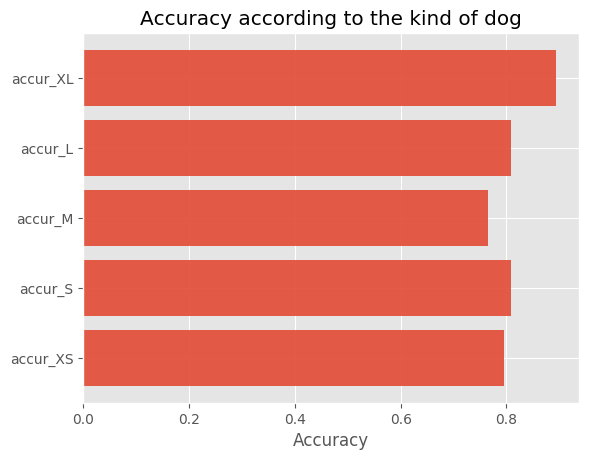

In [45]:
plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Accuracy according to the kind of dog')

plt.show()

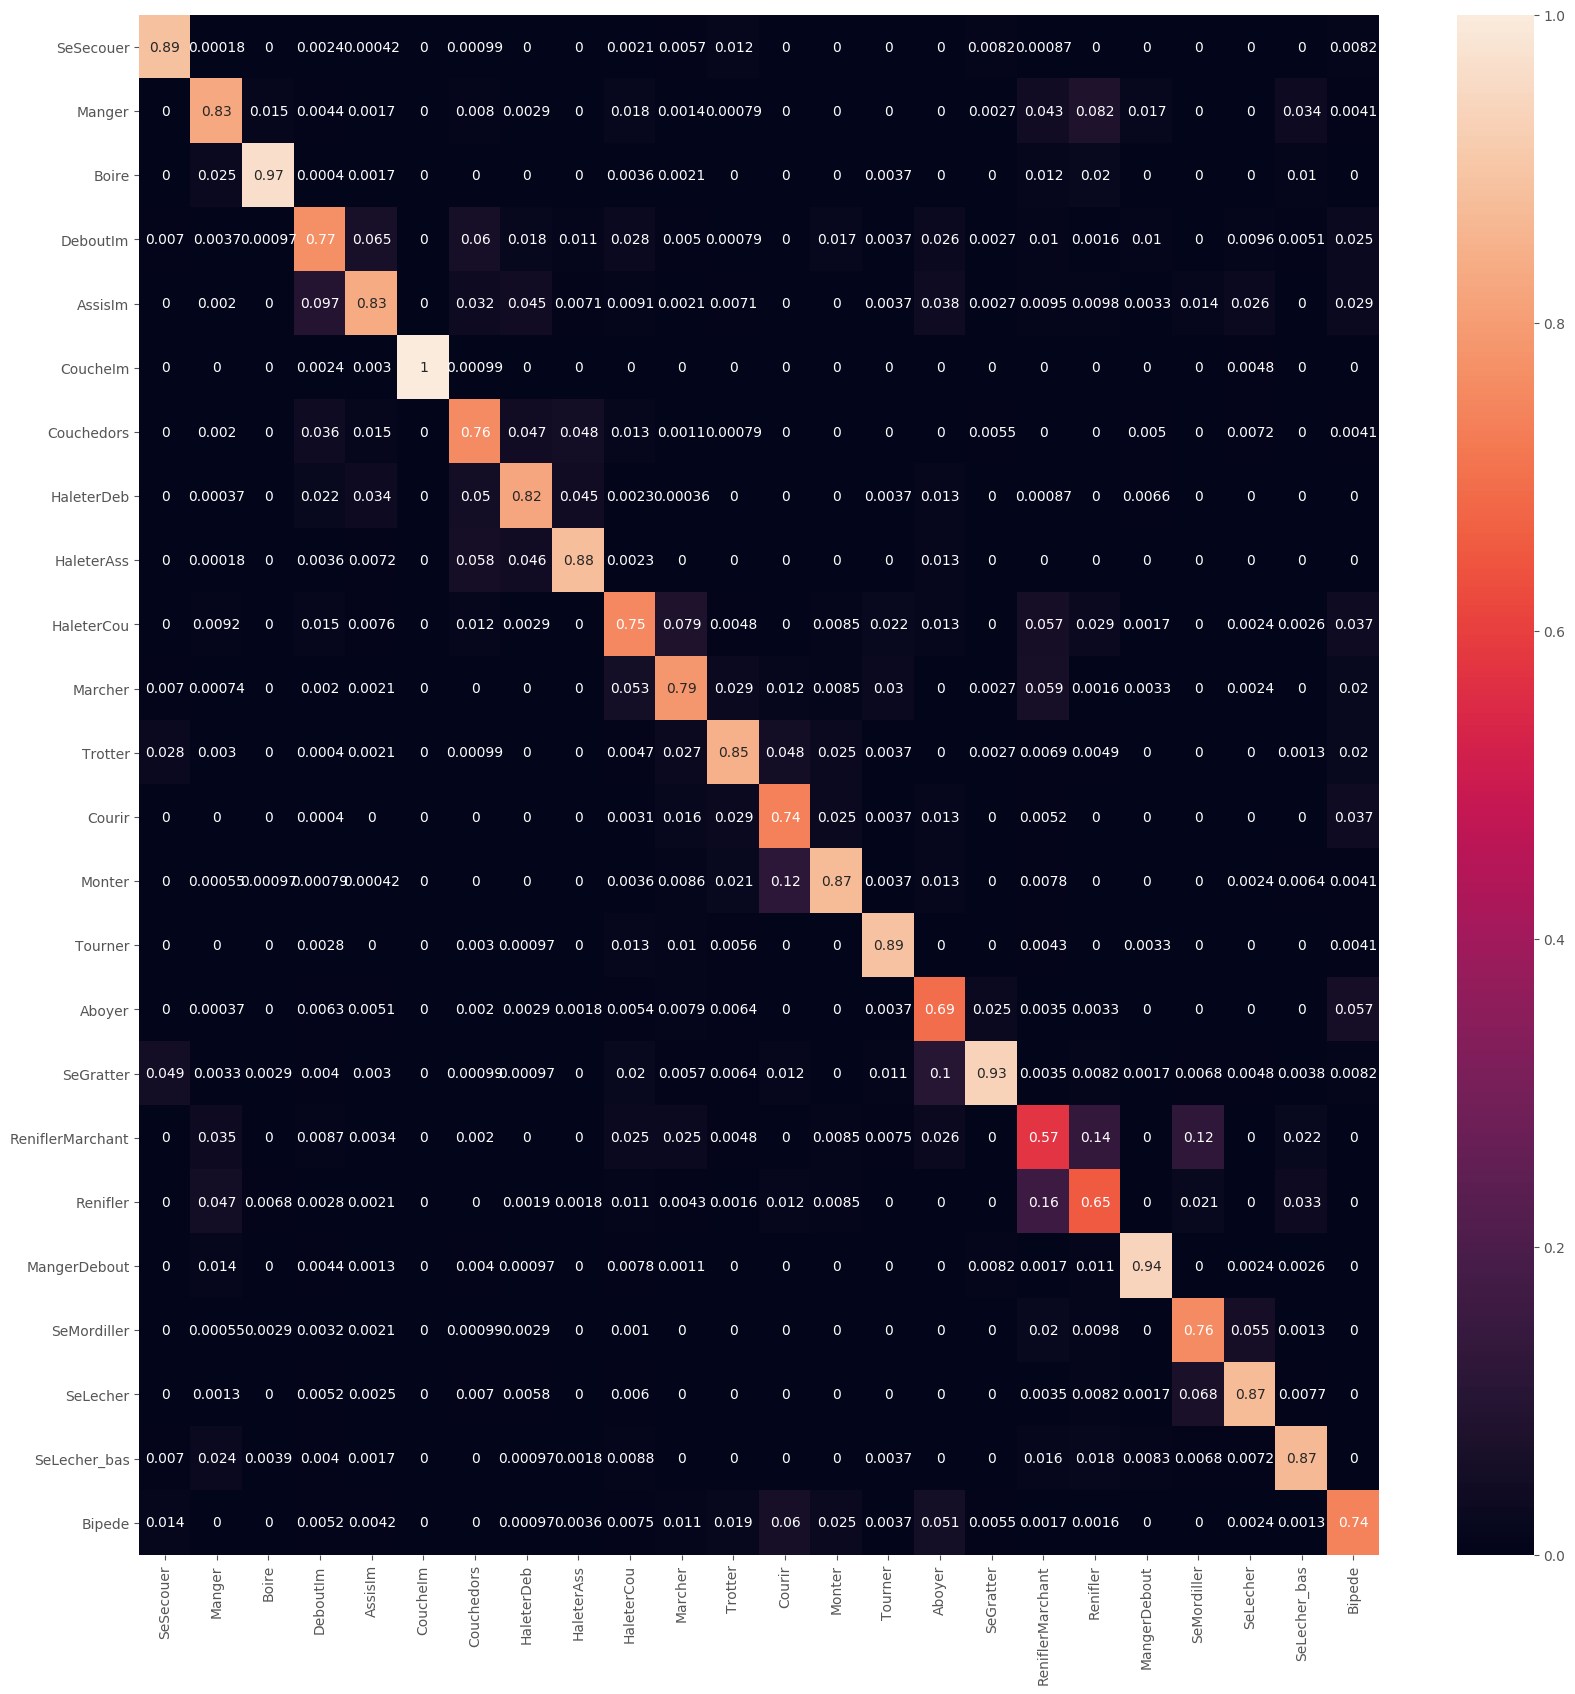

In [46]:
mat_con = confusion_matrix(train_y, prediction, labels = list_label)
df = pd.DataFrame(mat_con)
df.columns = list_label
df.index = list_label

sum_row = df.sum(axis = 0)

plt.figure(figsize = (20,20))
sns.heatmap(df/sum_row, annot = True, annot_kws = {"size": 10})
plt.show()

# Test sur N vidéos - In Progress

In [47]:
def import_predict(input_data, type_of_dog):
    test = pd.read_csv (input_data, delimiter="\t", header = -1).transpose()
    test.columns = list_name
    test['Type'] = type_of_dog
    
    print('Lenght of the data test: ', test.shape)
    
    to_predict = scaler.transform(test)

    for j in range(5):
        print('Model of the CV number:', j)
        for i in range(5):
            if j == 0  and i == 0:
                clf_pred = joblib.load('model_' + str(j) + '_' + str(i) + '_.pkl')
                final = pd.DataFrame(clf_pred.predict(to_predict), columns = [str(j) + '_' + str(i)])
            else:
                clf_pred = joblib.load('model_' + str(j) + '_' + str(i) + '_.pkl')
                final_stag = pd.DataFrame(clf_pred.predict(to_predict), columns = [str(j) + '_' + str(i)])
                final = pd.concat([final, final_stag],axis = 1)          
    
    list_output = []
    stag = final.transpose().apply(lambda x: x.value_counts()).fillna(0)
    for i in range(stag.shape[1]):
        list_output.append(np.argmax(stag[i].values) + 1)
    
    return list_output

In [48]:
def output_srt(input_data, output_txt):
    list_srt = []
    for i in range(input_data.shape[0]):
        if i == 0:
            string_init = '''\
            '''+ str(i + 1) + '''
            00:00:00.000 --> ''' + str(input_data['timestamps_2'][0]).split(' ')[2][:-3] + ''' 
            '''+ input_data['list_label'][0]
            list_srt.append(string_init)
        if (i > 0 and len(str(input_data['timestamps_2'][i-1]).split(' ')[2][:-3]) == 12 and len(str(input_data['timestamps_2'][i]).split(' ')[2][:-3]) == 12):
            string_init = '''
            '''+ str(i + 1) + '''
            '''+ str(input_data['timestamps_2'][i-1]).split(' ')[2][:-3] + ''' --> ''' + str(input_data['timestamps_2'][i]).split(' ')[2][:-3] + ''' 
            '''+ input_data['list_label'][i] 
            list_srt.append(string_init)
            #print(len(str(input_data['timestamps_2'][i-1]).split(' ')[2][:-3]))
    list_srt = [w.replace('.', ',') for w in list_srt]

    with open (output_txt, 'w') as fo:
        for d in list_srt:
            fo.write(str(d) + '\n')
            
scaler = joblib.load('min_max_scaler.pkl')            

In [49]:
def export_data(data_input, timestamp_name):

    timestamps = pd.read_csv (timestamp_name, delimiter="\t", header = -1)

    timestamps.columns = ['timestamps']

    out = timestamps.join(pd.DataFrame(data_input, columns = ['prediction']))
    out['timestamps_1'] = pd.to_datetime(out['timestamps'], unit = 's')
    out['timestamps_1_lag'] = out['timestamps_1'].shift(-1)
    out['timestamps_2'] = out['timestamps_1_lag'] - out['timestamps_1']
    out['timestamps_2'] = out['timestamps_2'].cumsum()
    out.drop_duplicates(subset = 'timestamps_2', inplace = True)
    out.dropna(inplace = True)
    
    table_ref = pd.DataFrame(list_num , columns = ['label_num']).join(pd.DataFrame(list_label, columns = ['list_label']))
    out = out.merge(table_ref, left_on = 'prediction', right_on ='label_num').sort_values(by = ['timestamps'])
    out.reset_index(drop = True, inplace = True)
    
    print('Lenght of the data test: ', out.shape)
    
    return out

# Noisette - Type S

In [50]:
out_list = import_predict('features_pattern_noisette.txt', 0.25)   
data_out = export_data(out_list, 'timestamps_detection_noisette.txt')
output_srt(data_out, 'prediction_S_noisette.txt')

('Lenght of the data test: ', (783, 42))
('Model of the CV number:', 0)
('Model of the CV number:', 1)
('Model of the CV number:', 2)
('Model of the CV number:', 3)
('Model of the CV number:', 4)
('Lenght of the data test: ', (781, 7))


In [51]:
data_out

timestamps  prediction            timestamps_1        timestamps_1_lag  \
0    1.497433e+09           4 2017-06-14 09:33:06.052 2017-06-14 09:33:07.026   
1    1.497433e+09           4 2017-06-14 09:33:07.026 2017-06-14 09:33:08.020   
2    1.497433e+09           4 2017-06-14 09:33:08.020 2017-06-14 09:33:08.098   
3    1.497433e+09          16 2017-06-14 09:33:08.098 2017-06-14 09:33:10.002   
4    1.497433e+09           2 2017-06-14 09:33:10.002 2017-06-14 09:33:10.072   
5    1.497433e+09          18 2017-06-14 09:33:10.072 2017-06-14 09:33:11.082   
6    1.497433e+09           4 2017-06-14 09:33:11.082 2017-06-14 09:33:12.066   
7    1.497433e+09           4 2017-06-14 09:33:12.066 2017-06-14 09:33:13.084   
8    1.497433e+09           1 2017-06-14 09:33:13.084 2017-06-14 09:33:14.056   
9    1.497433e+09          21 2017-06-14 09:33:14.056 2017-06-14 09:33:15.034   
10   1.497433e+09           7 2017-06-14 09:33:15.034 2017-06-14 09:33:16.008   
11   1.497433e+09           7 2017-06-14 09:33:16.008 2017-06-14 09:33:16.078   
12   1.497433e+09           7 2017-06-14 09:33:16.078 2017-06-14 09:33:17.054   
13   1.497433e+09           7 2017-06-14 09:33:17.054 2017-06-14 09:33:18.024   
14   1.497433e+09          21 2017-06-14 09:33:18.024 2017-06-14 09:33:19.026   
15   1.497433e+09          21 2017-06-14 09:33:19.026 2017-06-14 09:33:19.088   
16   1.497433e+09           4 2017-06-14 09:33:19.088 2017-06-14 09:33:20.072   
17   1.497433e+09           4 2017-06-14 09:33:20.072 2017-06-14 09:33:21.034   
18   1.497433e+09          21 2017-06-14 09:33:21.034 2017-06-14 09:33:22.034   
19   1.497433e+09          21 2017-06-14 09:33:22.034 2017-06-14 09:33:22.098   
20   1.497433e+09           8 2017-06-14 09:33:22.098 2017-06-14 09:33:23.064   
21   1.497433e+09           8 2017-06-14 09:33:23.064 2017-06-14 09:33:24.044   
22   1.497433e+09          12 2017-06-14 09:33:24.044 2017-06-14 09:33:25.044   
23   1.497433e+09           7 2017-06-14 09:33:25.044 2017-06-14 09:33:26.024   
24   1.497433e+09           7 2017-06-14 09:33:26.024 2017-06-14 09:33:26.098   
25   1.497433e+09           7 2017-06-14 09:33:26.098 2017-06-14 09:33:27.084   
26   1.497433e+09           5 2017-06-14 09:33:27.084 2017-06-14 09:33:28.052   
27   1.497433e+09           5 2017-06-14 09:33:28.052 2017-06-14 09:33:29.054   
28   1.497433e+09          21 2017-06-14 09:33:29.054 2017-06-14 09:33:30.012   
29   1.497433e+09           5 2017-06-14 09:33:30.012 2017-06-14 09:33:31.018   
..            ...         ...                     ...                     ...   
751  1.497433e+09           7 2017-06-14 09:42:42.026 2017-06-14 09:42:42.090   
752  1.497433e+09          15 2017-06-14 09:42:42.090 2017-06-14 09:42:43.058   
753  1.497433e+09          16 2017-06-14 09:42:43.058 2017-06-14 09:42:44.038   
754  1.497433e+09          16 2017-06-14 09:42:44.038 2017-06-14 09:42:45.026   
755  1.497433e+09          16 2017-06-14 09:42:45.026 2017-06-14 09:42:46.002   
756  1.497433e+09          16 2017-06-14 09:42:46.002 2017-06-14 09:42:46.082   
757  1.497433e+09          20 2017-06-14 09:42:46.082 2017-06-14 09:42:47.038   
758  1.497433e+09          20 2017-06-14 09:42:47.038 2017-06-14 09:42:48.018   
759  1.497433e+09          20 2017-06-14 09:42:48.018 2017-06-14 09:42:49.010   
760  1.497433e+09          16 2017-06-14 09:42:49.010 2017-06-14 09:42:49.098   
761  1.497433e+09          16 2017-06-14 09:42:49.098 2017-06-14 09:42:50.074   
762  1.497433e+09           7 2017-06-14 09:42:50.074 2017-06-14 09:42:51.058   
763  1.497433e+09           7 2017-06-14 09:42:51.058 2017-06-14 09:42:52.044   
764  1.497433e+09          16 2017-06-14 09:42:52.044 2017-06-14 09:42:53.016   
765  1.497433e+09           2 2017-06-14 09:42:53.016 2017-06-14 09:42:53.096   
766  1.497433e+09           2 2017-06-14 09:42:53.096 2017-06-14 09:42:54.068   
767  1.497433e+09           2 2017-06-14 09:42:54.068 2017-06-14 09:42:55.030   
768  1.497433e+09           2 2017-06-

# Louna - Type S

In [30]:
out_list = import_predict('features_louna.txt', 0.25)   
data_out = export_data(out_list, 'timestamp_detection_louna.txt')
output_srt(data_out, 'prediction_S_louna.txt')

('Lenght of the data test: ', (2380, 42))
('Model of the CV number:', 0)
('Model of the CV number:', 1)
('Model of the CV number:', 2)
('Model of the CV number:', 3)
('Model of the CV number:', 4)
('Lenght of the data test: ', (2330, 7))


# Huston - Type S

In [31]:
out_list = import_predict('features_huston.txt', 0.25)   
data_out = export_data(out_list, 'timestamps_detection_huston.txt')
output_srt(data_out, 'prediction_S_huston.txt')

('Lenght of the data test: ', (643, 42))
('Model of the CV number:', 0)
('Model of the CV number:', 1)
('Model of the CV number:', 2)
('Model of the CV number:', 3)
('Model of the CV number:', 4)
('Lenght of the data test: ', (641, 7))


# Icaro - Type M

In [32]:
out_list = import_predict('features_icaro.txt', 0.5)   
data_out = export_data(out_list, 'timestamp_detection_icaro.txt')
output_srt(data_out, 'prediction_M_icaro.txt')

('Lenght of the data test: ', (534, 42))
('Model of the CV number:', 0)
('Model of the CV number:', 1)
('Model of the CV number:', 2)
('Model of the CV number:', 3)
('Model of the CV number:', 4)
('Lenght of the data test: ', (523, 7))


# Livio - Type L

In [33]:
out_list = import_predict('features_livio.txt', 0.75)   
data_out = export_data(out_list, 'timestamp_detection_livio.txt')
output_srt(data_out, 'prediction_L_livio.txt')

('Lenght of the data test: ', (814, 42))
('Model of the CV number:', 0)
('Model of the CV number:', 1)
('Model of the CV number:', 2)
('Model of the CV number:', 3)
('Model of the CV number:', 4)
('Lenght of the data test: ', (807, 7))


# Hello - Type L

In [34]:
out_list = import_predict('features_hello.txt', 0.75)   
data_out = export_data(out_list, 'timestamp_detection_hello.txt')
output_srt(data_out, 'prediction_L_hello.txt')

('Lenght of the data test: ', (1002, 42))
('Model of the CV number:', 0)
('Model of the CV number:', 1)
('Model of the CV number:', 2)
('Model of the CV number:', 3)
('Model of the CV number:', 4)
('Lenght of the data test: ', (980, 7))
